In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
victimas= pd.read_excel('VictimasVS_202309 (1).xlsx')


In [3]:
victimas

,id_Caso,divipola,mun,depto,anio,mes,dia,id_persona,sexo,etnia,ocupacion,cal_victima,pob_vulnerable,partido_politico,grupo_armado,desc_grupo_armado,situacion_victima,edad,latitud,longitud
0,235240,17614,RIOSUCIO,CALDAS,1997,12,3,762455,HOMBRE,NaN,TRABAJO SIN ESPECIFICAR,CIVIL,FAMILIAR DE PERSONA VULNERABLE,NaN,NaN,NaN,MUERTA,NaN,5.423681,-75.702070
1,251906,68615,RIONEGRO,SANTANDER,2001,6,10,762542,MUJER,NaN,CAMPESINO,CIVIL,NaN,NaN,NaN,NaN,MUERTA,ADULTEZ (29-59 AÑOS),7.265010,-73.150147
2,251906,68615,RIONEGRO,SANTANDER,2001,6,10,762747,MUJER,NaN,ESTUDIANTE,CIVIL,NaN,NaN,NaN,NaN,MUERTA,ADOLESCENCIA (12-17 AÑOS),7.265010,-73.150147
3,359623,20570,PUEBLO BELLO,CESAR,0,0,0,401057,MUJER,NaN,SIN INFORMACIÓN,CIVIL,FAMILIAR DE PERSONA VULNERABLE,NaN,NaN,NaN,DESCONOCIDA,NaN,10.415062,-73.589011
4,359624,00000,SIN INFORMACION,SIN INFORMACION,0,0,0,401058,MUJER,NaN,SIN INFORMACIÓN,CIVIL,DESMOVILIZADO,NaN,NaN,NaN,VIVA,NaN,4.000000,-72.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17326,743898,41020,ALGECIRAS,HUILA,1961,3,0,787252,MUJER,NaN,CAMPESINO,CIVIL,NaN,NaN,NaN,NaN,DESCONOCIDA,NaN,2.522448,-75.315373
17327,743900,73352,ICONONZO,TOLIMA,1961,3,0,787256,MUJER,NaN,SIN INFORMACIÓN,CIVIL,NaN,NaN,NaN,NaN,DESCONOCIDA,NaN,4.176436,-74.531976
17328,743900,73352,ICONONZO,TOLIMA,1961,3,0,787257,MUJER,NaN,SIN INFORMACIÓN,CIVIL,NaN,NaN,NaN,NaN,DESCONOCIDA,NaN,4.176436,-74.531976
17329,743996,05088,BELLO,ANTIOQUIA,2002,11,26,787384,MUJER,NaN,ESTUDIANTE,CIVIL,NaN,NaN,NaN,NaN,VIVA,NaN,6.334069,-75.554665


In [4]:
victimas.dtypes

id_Caso                int64
divipola              object
mun                   object
depto                 object
anio                   int64
mes                    int64
dia                    int64
id_persona             int64
sexo                  object
etnia                 object
ocupacion             object
cal_victima           object
pob_vulnerable        object
partido_politico      object
grupo_armado          object
desc_grupo_armado     object
situacion_victima     object
edad                  object
latitud              float64
longitud             float64
dtype: object

In [6]:
victimas.isnull().sum()

id_Caso                  0
divipola                 0
mun                      0
depto                    0
anio                     0
mes                      0
dia                      0
id_persona               0
sexo                     0
etnia                15550
ocupacion                0
cal_victima              0
pob_vulnerable       16971
partido_politico     17311
grupo_armado         17263
desc_grupo_armado    17263
situacion_victima        0
edad                  2419
latitud                  0
longitud                 0
dtype: int64

Porcentaje de valores nulos

In [10]:
nulos_por_columna= victimas.isnull().sum()
porcentaje_nulos_por_columna = ( nulos_por_columna/ len(victimas)) * 100
print(porcentaje_nulos_por_columna)

id_Caso               0.000000
divipola              0.000000
mun                   0.000000
depto                 0.000000
anio                  0.000000
mes                   0.000000
dia                   0.000000
id_persona            0.000000
sexo                  0.000000
etnia                89.723617
ocupacion             0.000000
cal_victima           0.000000
pob_vulnerable       97.922797
partido_politico     99.884600
grupo_armado         99.607639
desc_grupo_armado    99.607639
situacion_victima     0.000000
edad                 13.957648
latitud               0.000000
longitud              0.000000
dtype: float64


En vista de que hay un alto porcentaje de valores nulos en las columnas etnia, pob_vulnerable, partido_politico, grupo_armado,y desc_grupo_armado vamos a omitirlas en nuestro analisis 

In [11]:
victimas.shape

(17331, 20)

In [18]:
columnas_a_eliminar = ['etnia', 'pob_vulnerable', 'partido_politico','grupo_armado','desc_grupo_armado']
victimas_df= victimas.drop(columnas_a_eliminar, axis=1)
victimas_df=victimas_df.dropna()

Distribución general:

¿Cómo se distribuyen los casos por año?

¿En qué departamentos y municipios se concentra el mayor número de casos?

¿Cuál es la distribución por sexo de las víctimas?

¿En qué rangos de edad se encuentran las víctimas?

Distribucion por años

In [105]:

casos_por_año = pd.DataFrame(victimas_df.groupby('anio').size().reset_index())
casos_por_año.columns = ['anio', 'cantidad_de_casos']
casos_por_año= casos_por_año[(casos_por_año['anio'] > 0)]

In [103]:

idx_max = casos_por_año['cantidad_de_casos'].idxmax()
año_max_casos = casos_por_año.loc[idx_max, 'anio']
total_max_casos = casos_por_año.loc[idx_max, 'cantidad_de_casos']

print(f"El año con el total máximo de casos reportados fue {año_max_casos}, Total de casos: {total_max_casos}")

El año con el total máximo de casos reportados fue 2002, Total de casos: 1305


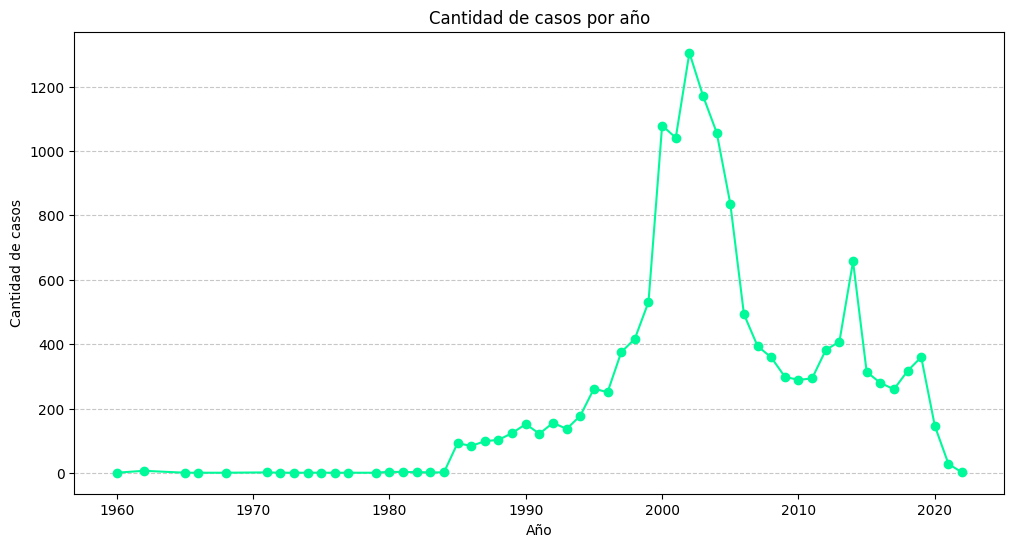

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(casos_por_año['anio'], casos_por_año['cantidad_de_casos'], marker='o', color='mediumspringgreen', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Cantidad de casos')
plt.title('Cantidad de casos por año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Con la gráfica anterior notamos que a partir de 1990 las victimas de abuso sexual fueron incrementando en el pais, llegando a su pico mas alto en el año 2002 con un total de 1305 victimas, a partir de ese año los casos disminuyeron

Distribución por departamentos

In [110]:

depto_df = pd.DataFrame(victimas_df.groupby('depto').size().reset_index())
depto_df.columns = ['departamento', 'catidad_de_casos']



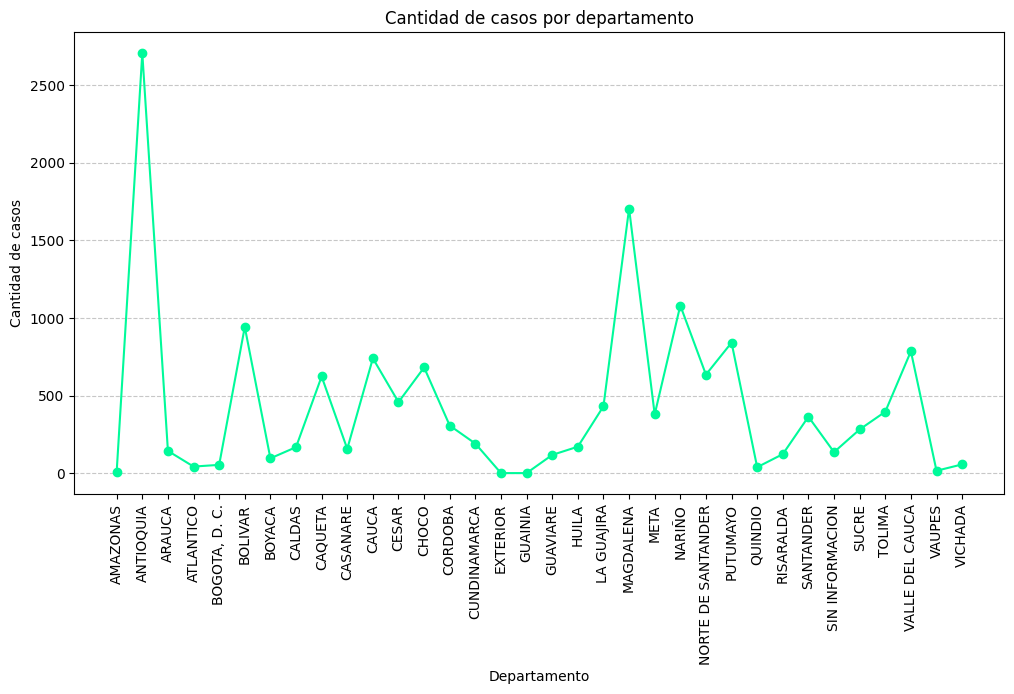

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(depto_df['departamento'], depto_df['catidad_de_casos'], marker='o', color='mediumspringgreen', linestyle='-')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de casos')
plt.title('Cantidad de casos por departamento')
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [124]:
depto_df.sort_values(by='catidad_de_casos', ascending=False).head(10)

,departamento,catidad_de_casos
1,ANTIOQUIA,2706
20,MAGDALENA,1705
22,NARIÑO,1081
5,BOLIVAR,943
24,PUTUMAYO,842
31,VALLE DEL CAUCA,786
10,CAUCA,741
12,CHOCO,682
23,NORTE DE SANTANDER,636
8,CAQUETA,624


Con la gráfica y tabla anterior podemos indentificar cuales son los departamentos con mas victimas reportadas, veamos que Antioquia es el departamento con mas victicmas con un total de 2706, seguido por Magdalena con 1705 victimas

Distribucion por sexo

In [130]:
victimas_df.groupby('sexo').size().reset_index(name='casos por sexo')

,sexo,casos por sexo
0,HOMBRE,1098
1,MUJER,13810
2,SIN INFORMACION,4


Concluimos que hay mas casos de mujeres reportadas a comporacion de los hombres

Rango de edades

In [142]:

victimas_df.groupby(['sexo', 'edad']).size().reset_index(name='Casos reportados')


,sexo,edad,Casos reportados
0,HOMBRE,ADOLESCENCIA (12-17 AÑOS),220
1,HOMBRE,ADULTEZ (29-59 AÑOS),364
2,HOMBRE,INFANCIA (6-11 AÑOS),129
3,HOMBRE,JUVENTUD (18-28 AÑOS),325
4,HOMBRE,PERSONA MAYOR (60 AÑOS O MAS),14
5,HOMBRE,PRIMERA INFANCIA (0-5 AÑOS),46
6,MUJER,ADOLESCENCIA (12-17 AÑOS),3656
7,MUJER,ADULTEZ (29-59 AÑOS),4105
8,MUJER,INFANCIA (6-11 AÑOS),887
9,MUJER,JUVENTUD (18-28 AÑOS),4978


Los rangos de edad se categorizan por infancia,adolescencia, juventud, adultez y persona mayor, como ya se habia mencionado las victimas en su mayoria son mujeres, y la mayoria de victimas se encuentran en la juventud con una edad entre 18-28 años con un total de 4978 casos reportados 

Caracteristicas de las victimas

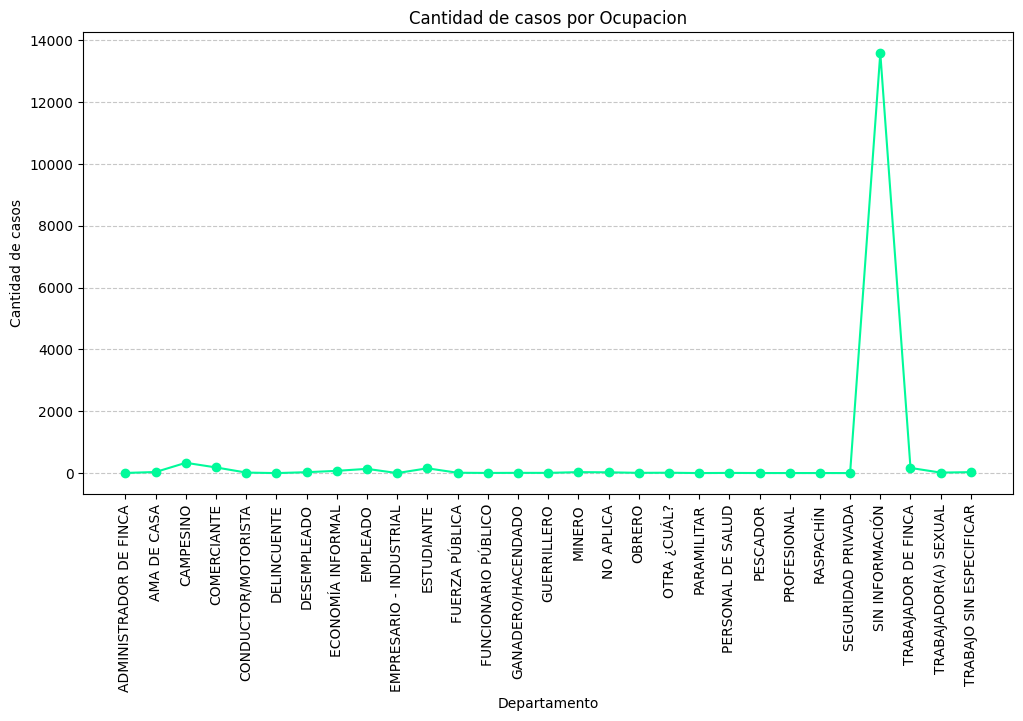

In [158]:
ocupacion_df=pd.DataFrame(victimas_df.groupby('ocupacion').size().reset_index(name='casos'))
ocupacion_df.columns = ['ocupacion', 'casos']

plt.figure(figsize=(12, 6))
plt.plot(ocupacion_df['ocupacion'], ocupacion_df['casos'], marker='o', color='mediumspringgreen', linestyle='-')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de casos')
plt.title('Cantidad de casos por Ocupacion')
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Situacion de la victima

In [162]:
victimas_df.groupby('situacion_victima').size().reset_index(name='casos')

,situacion_victima,casos
0,APARECIÓ MUERTO,1
1,DESCONOCIDA,12657
2,MUERTA,542
3,MUERTO EN CAUTIVERIO,1
4,ND,3
5,VIVA,1708
